# Plot Defection Rates

In this notebook, the defection rates of selected log files are plotted.

In [1]:
SELECTION = 'established'
# SELECTION = 'tournament'

## Read Files

In [2]:
import os

data_dir = os.path.join(os.getcwd(), 'data')
selection_dir = os.path.join(data_dir, SELECTION)

files = map(lambda f: os.path.normpath(os.path.join(selection_dir, f)),
            os.listdir(selection_dir))

files = list(filter(lambda f: os.path.splitext(f)[-1] == '.log',
                    files))

files.sort()

## Parsing Files

In [3]:
import re

def parse_move_table(log_text):
    move_table_list = []
    move_table = {}
    pattern_move = r'[^ ]* \[(.*)\] --> (.)'
    
    for line in log_text:
        if not line.strip() and move_table:
            move_table_list.append(move_table)
            move_table = {}
            continue
        
        match_move = re.search(pattern_move, line)
        if match_move:
            input_str = match_move.group(1)
            output_str = match_move.group(2)
            input_list = [x.strip() for x in input_str.split(',')]
            move_table[tuple(input_list)] = output_str
    
    if move_table:
        move_table_list.append(move_table)
        move_table = {}
    
    return move_table_list

In [4]:
move_tables = []

for file in files:
    with open(file, 'r') as f:
        mt = parse_move_table(f.readlines())
        if len(mt) < 200 and SELECTION == 'established':
            continue
        move_tables.append(mt)

In [5]:
defection_rates = []

for file in move_tables:
    dr = []
    for table in file:
        defections = 0
        for _, value in table.items():
            if value == 'D':
                defections += 1
        rate = defections / 8
        dr.append(rate)
    defection_rates.append(dr)

## Plot

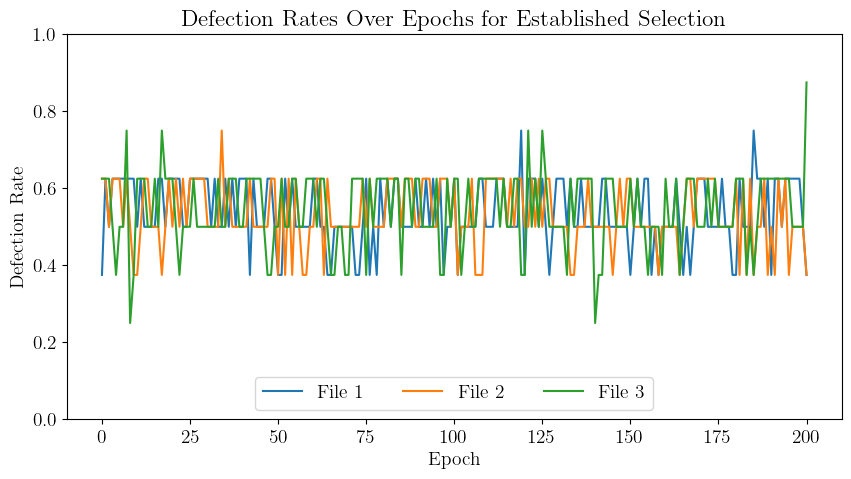

In [6]:
import matplotlib.pyplot as plt

plt.rcParams['pgf.texsystem'] = 'pdflatex'
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 14.0
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['savefig.bbox'] = 'tight'

for i, dr in enumerate(defection_rates):
    plt.plot(dr, label=f'File {i + 1}')

plt.ylim([0, 1])

plt.xlabel('Epoch')
plt.ylabel('Defection Rate')
plt.title(f'Defection Rates Over Epochs for {SELECTION.title()} Selection')
plt.legend(loc='lower center', ncols=len(defection_rates))

plt.savefig(f'plot_{SELECTION}.svg', format='svg')
plt.show()